In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet, set_random_seed
import joblib
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteScaledError, MeanSquaredScaledError
from math import sqrt, ceil, floor

In [2]:
set_random_seed(0)

In [3]:
# importar ../Data/DatosCicloAprovisionamiento.xlsx
df_ciclo = pd.read_excel('../Data/DatosCicloAprovisionamiento.xlsx')
df_ciclo = df_ciclo.sort_values(by=['sku']).reset_index(drop=True)
df_ciclo = df_ciclo.rename(columns={'sku': 'idSku'})
df_ciclo['ciclo_aprovisionamiento'] = df_ciclo['diasEntrePedidos'] + df_ciclo['diasLeadtime']
df_ciclo.head()

,idSku,diasEntrePedidos,diasLeadtime,ciclo_aprovisionamiento
0,1,18,2,20
1,2,28,4,32
2,3,28,2,30
3,4,14,2,16
4,5,14,4,18


In [4]:
# import dataser from csv file
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [5]:
results = pd.DataFrame(columns=['idSku', 'target', 'prediction'])

In [6]:
skus = train['idSku'].unique()

for s in skus:
    train_s = train[train['idSku'] == s]
    test_s = test[test['idSku'] == s]
    sku_s = pd.concat([train_s, test_s], ignore_index=True)
    sku_s = sku_s[['idSecuencia', 'udsVenta']]
    sku_s = sku_s.rename(columns={'idSecuencia': 'ds', 'udsVenta': 'y'})

    n_forecast = df_ciclo[df_ciclo['idSku'] == s]['ciclo_aprovisionamiento'].values[0]

    path = '../Neural_prophet_models/neural_prophet_' + str(s) + '.pkl'
    m = joblib.load(path)

    forecast = m.predict(sku_s, decompose=False, raw=True)
    forecast[forecast.columns[1:]] = forecast[forecast.columns[1:]].round().astype(int)
    forecast = forecast.tail(len(test_s))
    forecast = forecast.sum(axis=1).reset_index(drop=True).tolist()

    target = sku_s['y'].rolling(n_forecast).sum()
    target = target.tail(len(test_s))
    target = target.reset_index(drop=True).tolist()

    # create a list with idSku, target and prediction
    r = pd.DataFrame([s, target, forecast]).T
    r.columns = ['idSku', 'target', 'prediction']
    results = results.append(r)

results = results.reset_index(drop=True)

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.843% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\96gar\anaconda3\envs\neuralprophet\lib\site-packages\neuralprophet\forecaster.py:2098: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.848% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Users\96gar\anaconda3\envs\neuralprophet\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [7]:
results

,idSku,target,prediction
0,1,"[309.0, 309.0, 306.0, 294.0, 285.0, 270.0, 294...","[331, 342, 330, 306, 350, 317, 325, 377, 389, ..."
1,2,"[371.0, 380.0, 365.0, 356.0, 368.0, 371.0, 384...","[417, 440, 435, 433, 417, 416, 417, 416, 424, ..."
2,3,"[190.0, 186.0, 195.0, 186.0, 186.0, 193.0, 189...","[91, 93, 88, 84, 80, 76, 71, 66, 67, 62, 58, 5..."
3,4,"[123.0, 123.0, 132.0, 126.0, 126.0, 123.0, 129...","[105, 112, 109, 113, 123, 107, 102, 122, 133, ..."
4,5,"[30.0, 22.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0...","[-65, -79, -84, -91, -80, -87, -93, -107, -122..."
5,6,"[72.0, 75.0, 81.0, 72.0, 69.0, 72.0, 81.0, 78....","[114, 130, 114, 118, 119, 121, 116, 114, 130, ..."
6,7,"[204.0, 210.0, 225.0, 222.0, 231.0, 237.0, 231...","[136, 140, 135, 130, 126, 121, 114, 113, 116, ..."
7,8,"[77.0, 69.0, 69.0, 77.0, 76.0, 80.0, 85.0, 76....","[73, 79, 78, 71, 71, 71, 73, 73, 79, 78, 71, 7..."
8,9,"[105.0, 78.0, 78.0, 99.0, 99.0, 96.0, 93.0, 84...","[108, 121, 125, 130, 134, 135, 118, 118, 132, ..."
9,10,"[77.0, 81.0, 78.0, 72.0, 81.0, 84.0, 96.0, 90....","[27, 29, 29, 24, 18, 17, 20, 20, 19, 15, 15, 1..."


In [14]:
# RMSE: Root Mean Squared Error
# MAPE: Mean Absolute Percentage Error
# MASE: Mean Absolute Scaled Error
# SMAPE: Symmetric Mean Absolute Percentage Error
# RMSSE: Root Mean Squared Scaled Error

results['RMSE'] = np.nan
results['MAPE'] = np.nan
results['MASE'] = np.nan
results['SMAPE'] = np.nan
results['RMSSE'] = np.nan

rmse = MeanSquaredError(square_root=True)
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()
smape = MeanAbsolutePercentageError(symmetric=True)
rmsse = MeanSquaredScaledError(square_root=True)

# calculate rmse for each sku and append to results dataframe
for i in range(0, 50):
    t = pd.Series(results['target'][i])
    p = pd.Series(results['prediction'][i])
    y_train = train[train['idSku'] == i+1]['udsVenta']
    results['RMSE'][i] = rmse(t, p)
    results['MAPE'][i] = mape(t, p)
    results['MASE'][i] = mase(t, p, y_train=y_train)
    results['SMAPE'][i] = smape(t, p)
    results['RMSSE'][i] = rmsse(t, p, y_train=y_train)
results

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_16344\2379025414.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['RMSE'][i] = rmse(t, p)

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_16344\2379025414.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['MAPE'][i] = mape(t, p)

WARNING - (py.warnings._showwarnmsg) - C:\Users\96gar\AppData\Local\Temp\ipykernel_16344\2379025414.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,idSku,target,prediction,RMSE,MAPE,MASE,SMAPE,RMSSE
0,1,"[309.0, 309.0, 306.0, 294.0, 285.0, 270.0, 294...","[331, 342, 330, 306, 350, 317, 325, 377, 389, ...",161.246027,4.986866e-01,13.023918,0.387341,11.162245
1,2,"[371.0, 380.0, 365.0, 356.0, 368.0, 371.0, 384...","[417, 440, 435, 433, 417, 416, 417, 416, 424, ...",91.523520,1.534429e-01,5.656080,0.168383,5.306549
2,3,"[190.0, 186.0, 195.0, 186.0, 186.0, 193.0, 189...","[91, 93, 88, 84, 80, 76, 71, 66, 67, 62, 58, 5...",402.493857,1.516142e+00,42.502461,1.841839,35.200450
3,4,"[123.0, 123.0, 132.0, 126.0, 126.0, 123.0, 129...","[105, 112, 109, 113, 123, 107, 102, 122, 133, ...",39.026934,2.239911e-01,3.564074,0.266529,3.770380
4,5,"[30.0, 22.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0...","[-65, -79, -84, -91, -80, -87, -93, -107, -122...",726.782308,1.611444e+16,70.302270,2.000000,57.461782
5,6,"[72.0, 75.0, 81.0, 72.0, 69.0, 72.0, 81.0, 78....","[114, 130, 114, 118, 119, 121, 116, 114, 130, ...",46.402451,3.929524e-01,4.362186,0.345169,3.763322
6,7,"[204.0, 210.0, 225.0, 222.0, 231.0, 237.0, 231...","[136, 140, 135, 130, 126, 121, 114, 113, 116, ...",322.837783,1.333189e+00,40.631348,1.692822,35.390335
7,8,"[77.0, 69.0, 69.0, 77.0, 76.0, 80.0, 85.0, 76....","[73, 79, 78, 71, 71, 71, 73, 73, 79, 78, 71, 7...",25.723895,3.113616e-01,3.644716,0.295806,3.382999
8,9,"[105.0, 78.0, 78.0, 99.0, 99.0, 96.0, 93.0, 84...","[108, 121, 125, 130, 134, 135, 118, 118, 132, ...",113.512045,9.779730e-01,16.952832,0.591702,14.542413
9,10,"[77.0, 81.0, 78.0, 72.0, 81.0, 84.0, 96.0, 90....","[27, 29, 29, 24, 18, 17, 20, 20, 19, 15, 15, 1...",99.479505,2.005195e+00,16.776863,1.902047,13.839403


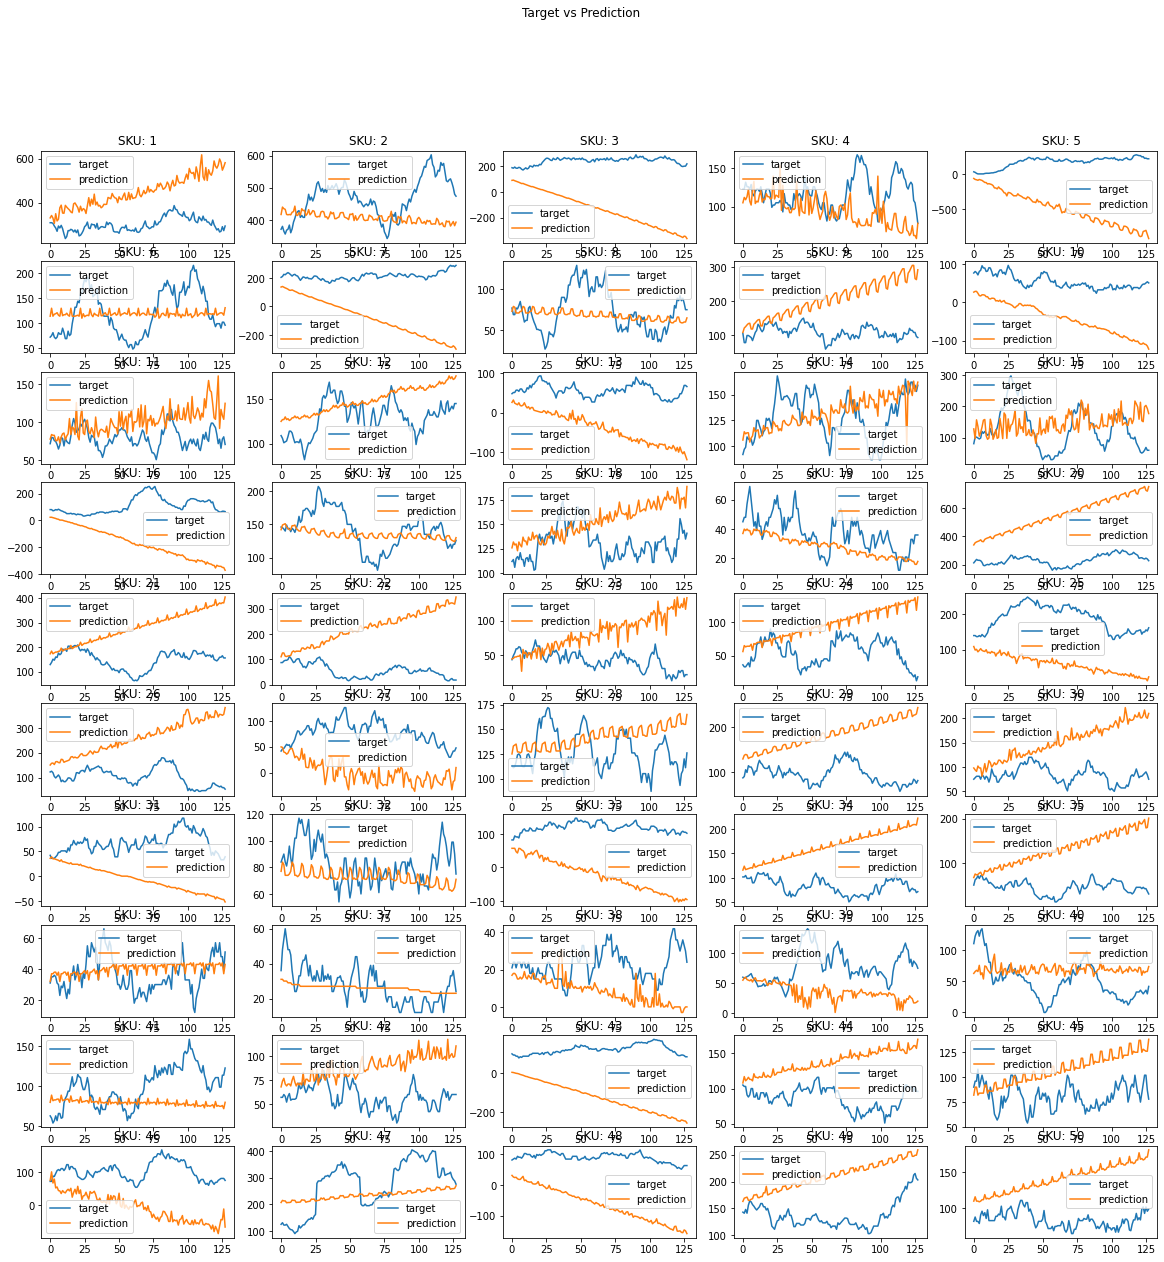

In [17]:
# make 50 subplots in a 10x5 grid and plot the target and prediction
fig, axs = plt.subplots(10, 5, figsize=(20, 20))
fig.suptitle('Target vs Prediction')
for i in range(10):
    for j in range(5):
        axs[i, j].plot(results['target'][i*5+j], label='target')
        axs[i, j].plot(results['prediction'][i*5+j], label='prediction')
        axs[i, j].legend()
        axs[i, j].set_title('SKU: ' + str(i*5+j+1))
plt.show()

In [18]:
# get the metrics of the results dataframe
metrics = results[['RMSE', 'MAPE', 'MASE', 'SMAPE', 'RMSSE']]

# get the mean of each metric
metrics_mean = metrics.mean()
metrics_mean

RMSE     1.110370e+02
MAPE     4.236198e+14
MASE     1.700222e+01
SMAPE    7.993801e-01
RMSSE    1.421698e+01
dtype: float64

In [19]:
df_precio = pd.read_excel('../Data/DatosPrecioMedio.xlsx')
df_precio = df_precio.rename(columns={'idSkuIta': 'idSku'})
df_precio = df_precio.sort_values(by=['idSku']).reset_index(drop=True)
df_precio.head()

,idSku,eurPrecioMedio
0,1,1.370002
1,2,1.370002
2,3,1.370002
3,4,1.370002
4,5,1.370002


In [20]:
df_ciclo = df_ciclo.merge(df_precio, on='idSku', how='inner')
df_ciclo = df_ciclo.merge(results[['idSku', 'RMSE']], on='idSku', how='inner')
df_ciclo.head()

,idSku,diasEntrePedidos,diasLeadtime,ciclo_aprovisionamiento,eurPrecioMedio,RMSE
0,1,18,2,20,1.370002,161.246027
1,2,28,4,32,1.370002,91.523520
2,3,28,2,30,1.370002,402.493857
3,4,14,2,16,1.370002,39.026934
4,5,14,4,18,1.370002,726.782308


In [23]:
factor = 1.64
df_ciclo['stock_seguridad'] = df_ciclo.apply(lambda x: ceil(factor * x['RMSE'] * sqrt(x['ciclo_aprovisionamiento'])), axis=1)
df_ciclo.head()

,idSku,diasEntrePedidos,diasLeadtime,ciclo_aprovisionamiento,eurPrecioMedio,RMSE,stock_seguridad
0,1,18,2,20,1.370002,161.246027,1183
1,2,28,4,32,1.370002,91.523520,850
2,3,28,2,30,1.370002,402.493857,3616
3,4,14,2,16,1.370002,39.026934,257
4,5,14,4,18,1.370002,726.782308,5057


In [24]:
df_ciclo['coste_stock_diario'] = df_ciclo.apply(lambda x: 0.05 * x['eurPrecioMedio'] * x['stock_seguridad'], axis=1)
df_ciclo.head()

,idSku,diasEntrePedidos,diasLeadtime,ciclo_aprovisionamiento,eurPrecioMedio,RMSE,stock_seguridad,coste_stock_diario
0,1,18,2,20,1.370002,161.246027,1183,81.035593
1,2,28,4,32,1.370002,91.523520,850,58.225067
2,3,28,2,30,1.370002,402.493857,3616,247.696284
3,4,14,2,16,1.370002,39.026934,257,17.604520
4,5,14,4,18,1.370002,726.782308,5057,346.404897


In [25]:
coste_stock_diario_total = df_ciclo['coste_stock_diario'].sum().round(2)
coste_stock_diario_anual = coste_stock_diario_total * 365

print('Coste stock total diario: {}€'.format(coste_stock_diario_total))
print('Coste stock total anual: {}€'.format(coste_stock_diario_anual))

Coste stock total diario: 6213.49€
Coste stock total anual: 2267923.85€
